<h1 style='color:orange'>Predict the Diabete Progression with XGBOOST</h1>

## Purpose of the Project
It aims to use medical data,sklearn diabete dataset, to predict the progression of diabete.
This work allow:
* A better understanding of factors which increase the risk of Diabete
* Craft predictives tools which may assist doctors in diagnosis and treatment planning
* Show how to implement Machine Learning  in medical field

## Steps

# 1) Loading Data with Pandas
I load and inspect the first rows,dimensions and general informations of this datasets through:
* X.head()
* X.shape()
* X.info()

# 2) EDA
It consists of:
* handling Descriptive Statistics
* Visualizing the target Distribution: We wanna check if it follows a particular distibution. It is important in modelisation
* Seeing the correlation of each variable with the Diabete progression :That way ,we can see the variables which impact more the progression of 
    Datasets.It allows to decrease the risks of Diabete

# 3) Data Pretraitement
For improving the performance of training, I standardize and scale the data.

# 4) Model Training
I train our model using the diabete dataset and XBOOST
.I also use cross_val_score to evaluate the robustness of our modele. 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import xgboost as xgb

In [80]:
data = load_diabetes()
X = pd.DataFrame(data.data,
                columns=data.feature_names)
y = pd.Series(data.target,
                name= 'Progression')
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


# Explain features

# Age
It is the age in years. As soon as data have been centered,negative value correspond to age which are above the average age and positive are those which are greater than the average mean 

# Sex
As it sounds,this variable can have two value: Male or Female. Sex variable is then encoded: 0 corespond to female and 1 to male.

# bmi
bmi corresponds to Body Mass Index

# bp
It is the measure of Blood Pressure

# s1
The Total serum cholesterol

# s2
The low-density lipoproteins

# s3
The high-density lipoproteins

# s5
Log of serum triglyceride

# s6
Glycemie or Blood sugar level

## Go further
If you wanna go further, for getting a better understanding of these features , I suggest you these websites

* https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

* https://www.who.int/news/-room/fact-sheets/detail/diabetes


In [81]:
#See statistics about this dataset
print(X.shape)
print(X.info())
print(X.describe())

(442, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   

In [82]:
print(X.corrwith(y))

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64


# See the correlation between each variables and progression
 * Body Mass Index (bmi) and log of serum triglycerid (s5) impact more the progression of diabete regarding to their correlation with the diabete progression. 
 * But High Density LipoProteins (s5) doesnt have a big impact in the diabete progression. The negative correlation testify to this fact. As a consequence , High Density LipoProteins is not a major factor 

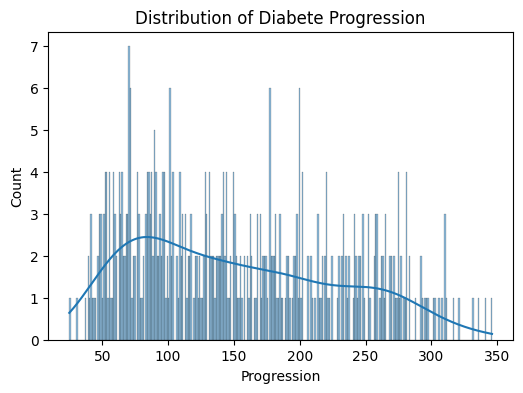

In [83]:
#Lets try to see whether the progression follow a particular distribution or not
plt.figure(figsize=(6,4))
sns.histplot(y,bins=300,kde=True)
plt.title('Distribution of Diabete Progression')
plt.show() # as soon as we use jupiter, it is useless. With others such as SPIDER, you will need to add thi command

# Splitting the data in train and test 

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
#Checking there are no issue with dimension
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(353, 10) (353,) (89, 10) (89,)


## Model Training Using XGBOOST

In [86]:
model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 90,
    learning_rate = 0.05,
    max_depth = 3,
    subsample = 0.8,
    colsample_bytree = 0.7,
    reg_alpha= 0.2,
    reg_lambda = 0.3,
    random_state = 42
)

# training model
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [87]:
cv = KFold(n_splits=5,
shuffle=True,random_state = 42)
scores = cross_val_score(model,X,y,cv=cv,scoring='r2')
print(scores)
print(f'The set of scores has a mean of: {np.mean(scores)} and a standard deviation of {np.std(scores)}')


[0.47623078 0.54342653 0.32505553 0.52405784 0.42301035]
The set of scores has a mean of: 0.45835620441879044 and a standard deviation of 0.07860224251009348


In [88]:
# Now we save the model

import joblib

joblib.dump(model,"model.joblib",compress=0)

['model.joblib']

as## What I has learntsave()saves

* How to implement a complet data science workflow: Exploration -> Pretraitment > Modelisation -> Evaluation
* The importance of data Standardization in Model Training
* How to handle XGBOOST ,one the most performant algorithm for regression . It can be extend to Classification
* How to interpret the results through the importance of features and correlations

## Purpose , Impacts or Avantages
The Diabete is a chronic disease which touch a lot of people in the world
A predictive Model may :
* Monitor and Anticipate disease advancement
* Improve Prevention
* Help Medical research


<h3 style='color:red'>Even I use a small,public and simplified datasets , it shows how AI may positively impact 
the health Domain</h3>
